<a href="https://colab.research.google.com/github/sfangulof/MAF-Challenge-Bancolombia/blob/main/Fase%20pr%C3%A1ctica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint
from statsmodels.tsa.vector_ar.vecm import coint_johansen
import matplotlib.pyplot as plt

In [3]:
pip install pandas pandas_datareader


In [4]:
import pandas as pd
import pandas_datareader.data as web
import datetime

In [5]:
start_date = datetime.datetime(2000, 1, 1)
end_date = datetime.datetime.now()


In [6]:
# Obtener la tasa de desempleo
unemployment_data = web.DataReader('UNRATE', 'fred', start_date, end_date)

# Obtener la tasa de rendimientos a 1 año de los bonos del Tesoro
treasury_yield_data = web.DataReader('GS1', 'fred', start_date, end_date)


In [7]:
# Unir los datos en un solo DataFrame
data = unemployment_data.join(treasury_yield_data, how='inner')

# Renombrar las columnas para mayor claridad
data.columns = ['Unemployment_Rate', 'Treasury_Yield']

# Mostrar las primeras filas del DataFrame
print(data.head())


            Unemployment_Rate  Treasury_Yield
DATE                                         
2000-01-01                4.0            6.12
2000-02-01                4.1            6.22
2000-03-01                4.0            6.22
2000-04-01                3.8            6.15
2000-05-01                4.0            6.33


In [8]:
coint_test = coint(data['Unemployment_Rate'], data['Treasury_Yield'])
coint_statistic, p_value, critical_values = coint_test

print(f"Estadístico de Cointegración: {coint_statistic}")
print(f"P-valor: {p_value}")
print(f"Valores críticos: {critical_values}")

Estadístico de Cointegración: -3.74744502316826
P-valor: 0.015904781168272267
Valores críticos: [-3.93433972 -3.35713502 -3.05900656]


In [9]:
# Prueba de Johansen
johansen_test = coint_johansen(data, det_order=0, k_ar_diff=1)

print("Estadísticos de traza:", johansen_test.lr1)
print("Valores críticos (90%, 95%, 99%):\n", johansen_test.cvt)
print("\nEstadísticos de máximo eigenvalue:", johansen_test.lr2)
print("Valores críticos (90%, 95%, 99%):\n", johansen_test.cvm)


Estadísticos de traza: [24.20407806  4.98601975]
Valores críticos (90%, 95%, 99%):
 [[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]

Estadísticos de máximo eigenvalue: [19.2180583   4.98601975]
Valores críticos (90%, 95%, 99%):
 [[12.2971 14.2639 18.52  ]
 [ 2.7055  3.8415  6.6349]]


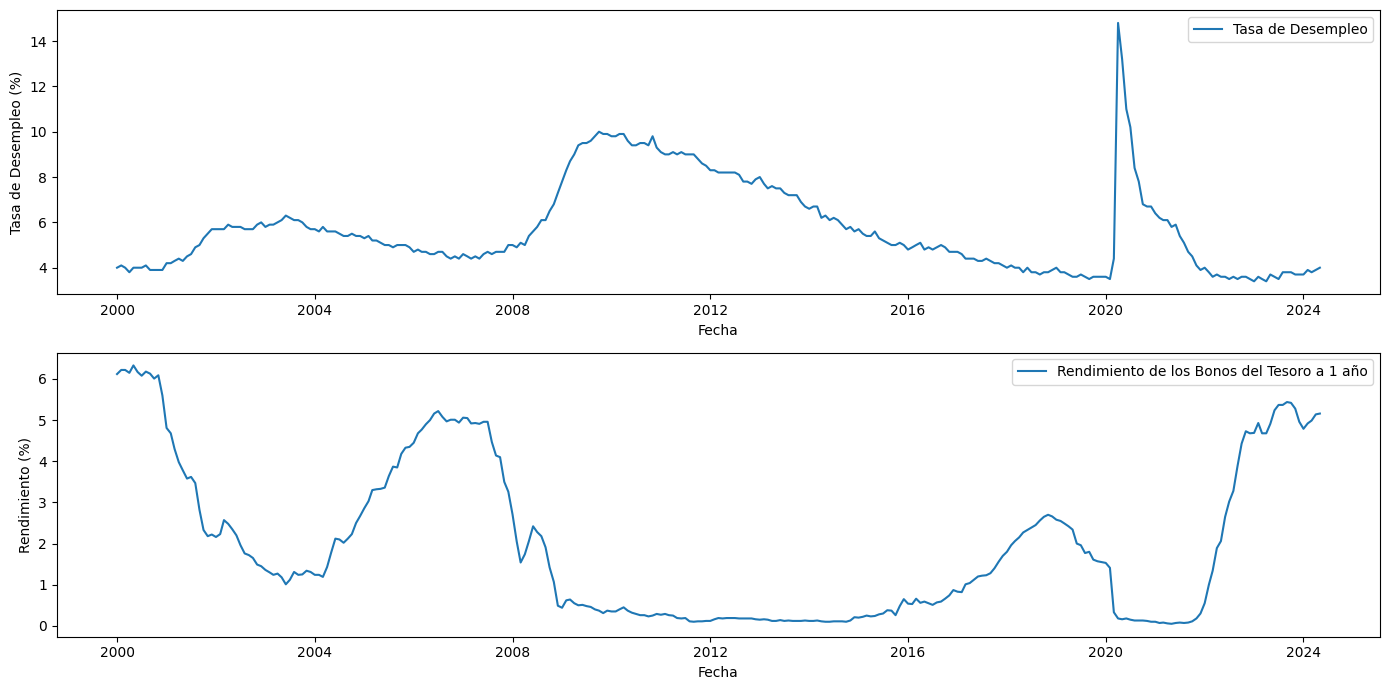

In [10]:
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.plot(data.index, data['Unemployment_Rate'], label='Tasa de Desempleo')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Tasa de Desempleo (%)')

plt.subplot(2, 1, 2)
plt.plot(data.index, data['Treasury_Yield'], label='Rendimiento de los Bonos del Tesoro a 1 año')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Rendimiento (%)')

plt.tight_layout()
plt.show()


In [11]:
print(data.head())

            Unemployment_Rate  Treasury_Yield
DATE                                         
2000-01-01                4.0            6.12
2000-02-01                4.1            6.22
2000-03-01                4.0            6.22
2000-04-01                3.8            6.15
2000-05-01                4.0            6.33
